In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import math
import tensorflow as tf
from sklearn import cluster
from sklearn import mixture
from sklearn import decomposition
import pylab

%matplotlib inline

file_name = "fac_filled.txt"
num_clusters = 5
colors = ['red','green','blue','purple','brown']

In [2]:
x = np.loadtxt(file_name)

In [18]:
# Try KM first
km = cluster.KMeans(n_clusters=3, random_state=5).fit(x)
km.predict(x)

array([1, 2, 0, ..., 1, 0, 0], dtype=int32)

In [34]:
dbs = cluster.DBSCAN(eps=0.3, min_samples=5).fit(x)
dbs_predicts = dbs.labels_ - np.min(dbs.labels_)
dbs_predicts

array([ 0,  1,  0, ..., 40,  0,  0])

In [19]:
gmm = mixture.GMM(n_components=3, covariance_type='full').fit(x) #VBGMM(n_components=5, covariance_type='full').fit(x)  #.BayesianGaussianMixture()#.fit(x) #
gmm.predict(x)

array([2, 1, 2, ..., 2, 2, 0])

In [20]:
pca = decomposition.PCA(n_components=2)
x_r = pca.fit(x).transform(x)

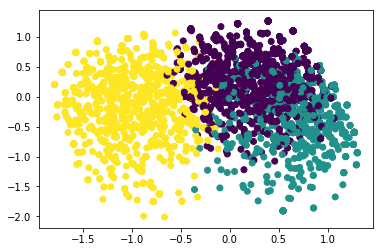

In [21]:
plt.scatter(x_r[:,0], x_r[:,1], c=km.labels_.astype(str))

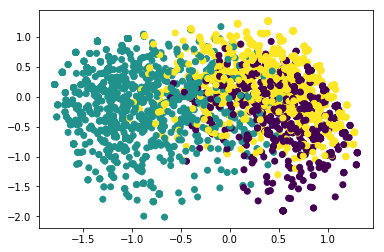

In [22]:
plt.scatter(x_r[:,0], x_r[:,1], c=gmm.predict(x).astype(str))

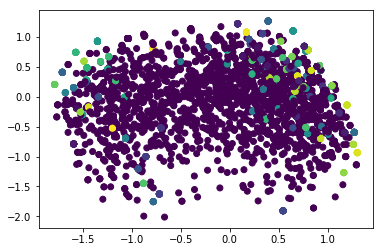

In [35]:
plt.scatter(x_r[:,0], x_r[:,1], c=dbs_predicts.astype(str))

# It looks like GMM and KM do around the same performance. 

In [36]:
km.cluster_centers_ 

array([[ 0.61923848,  0.7762191 ,  0.7000668 ,  0.24181697,  0.94722779,
         0.63193053,  0.8243153 ,  0.47828991,  0.91917168,  0.43687375,
         0.48964596,  0.33333333,  0.92050768,  0.06078824,  0.0240481 ],
       [ 0.6536643 ,  0.77895981,  0.40189125,  0.26713948,  0.95390071,
         0.73167849,  0.84160757,  0.75886525,  0.92907801,  0.37115839,
         0.57565012,  0.51891253,  0.96335697,  0.58274232,  0.92316785],
       [ 0.52402135,  0.69395018,  0.61120996,  0.26957295,  0.07117438,
         0.51245552,  0.52491103,  0.22775801,  0.09519573,  0.68594306,
         0.38790036,  0.2588968 ,  0.11654804,  0.24644128,  0.2455516 ]])